In [1]:
##importing the required libraries and modules
import os                                     # os sytem modalities
import pandas as pd                           # dataframe functioning and data analysis
import matplotlib.pyplot as plt               # visualization 
import networkx as nx                         # graph visualization 
#os.chdir(r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02')
from pylab import rcParams                    # for visualization 
import pprint                                 # for printing
import warnings
warnings.filterwarnings("ignore")             # to remove some warnings

# Task 8 Compile Node/Edge lists from PPIs

In [2]:
def producing_node_edge_files(input_file):
    """function to generate node and edge files
    Arg- input_file: PPI file
    Output - node file, edge file"""
    
    ppi_data=pd.read_csv(input_file)             # reading the input file
    
    out_node=ppi_data['out'].unique().tolist()   # unique out nodes
    in_node=ppi_data['in'].unique().tolist()     # unique in nodes
    
    total_nodes= (out_node)+ (in_node)           # combined nodes
    total_nodes=list(set(total_nodes))           # removing redundant nodes
    total_nodes=sorted(total_nodes)              # sorting it to reproduce same set of identifier - node pair node_list={(i+1): total_nodes[i] for i in range(len(total_nodes))}
     
    node_list={(i+1): total_nodes[i] for i in range(len(total_nodes))}
# dict comprehension to assign an unique identifier to a node using a simple range function

    print("Generating the node file...")
    with open('node_list.tsv','w') as f:
        for node in node_list:
            f.write("{}\t{}\n".format(node, node_list[node]))

    edge_list=[]                                     # a list to hold the edge information
    node_list_inv={j:i for i,j in node_list.items()} # inverting the dictionary i.e. k,v becomes v,k
    for i in  range(len(ppi_data['out'])):           # populating the list with the info
        edge_list.append((node_list_inv[ ppi_data['out'][i]],node_list_inv[ ppi_data['in'][i]] ,ppi_data['interaction_type'][i]))
        
    print("Generating the edge file...")    
    with open('edge_list.tsv','w') as f:             
        for edge in edge_list:                      # writing an output file with metadata
            f.write("{}\t{}\t{}\n".format( *edge ))

        
    with open('edge_list_no_metadata.tsv','w') as f:          # writing an output file with no metadata
        for edge in edge_list:
            f.write("{}\t{}\n".format(edge[0],edge[1]))
            
    print("The files are successfully saved in the path {}.".format(os.getcwd()))

In [3]:
producing_node_edge_files(r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\homework_exercise02_data_ppis.csv' )

Generating the node file...
Generating the edge file...
The files are successfully saved in the path C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02.


# Task 8 - Step by Step with results visualized

### Opening the input csv file

In [4]:
ppi_data=pd.read_csv(r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\homework_exercise02_data_ppis.csv')
ppi_data.head()

,out,interaction_type,in
0,KAT6A,physical association,RPL10
1,SYMPK,physical association,KAT6A
2,STX8,physical association,VAMP3
3,STX8,physical association,NSF
4,ELAVL1,colocalization,ABCD1


### Finding out the unique nodes

In [5]:
out_node=ppi_data['out'].unique().tolist()   # unique out nodes
in_node=ppi_data['in'].unique().tolist()     # unique in nodes

In [6]:
total_nodes= (out_node)+ (in_node)           # combined nodes
total_nodes=list(set(total_nodes))           # removing redundant nodes
total_nodes=sorted(total_nodes)              # sorting it to reproduce same set of identifier - node pair 

In [7]:
len(total_nodes)

621

### Assignment of the nodes to an unique identifier - Nodes List

In [8]:
node_list={(i+1): total_nodes[i] for i in range(len(total_nodes))}
# dict comprehension to assign an unique identifier to a node using a simple range function

### Writing the nodes to the .tsv file

In [9]:
with open('node_list.tsv','w') as f:
    for node in node_list:
        f.write("{}\t{}\n".format(node, node_list[node]))

In [10]:
!cat node_list.tsv | head  
# displaying the contents of the node_list.tsv file

1	AARS1
2	ABAT
3	ABCD1
4	ABL1
5	ABRAXAS1
6	ACKR3
7	ACO2
8	ACSL4
9	ACTR2
10	ADRB2


cat: write error: No space left on device


### Preparing Edges List

In [11]:
edge_list=[]                                     # a list to hold the edge information
node_list_inv={j:i for i,j in node_list.items()} # inverting the dictionary i.e. k,v becomes v,k
for i in  range(len(ppi_data['out'])):           # populating the list with the info
    edge_list.append((node_list_inv[ ppi_data['out'][i]],node_list_inv[ ppi_data['in'][i]] ,ppi_data['interaction_type'][i]))

### Writing the edges to .tsv file

In [12]:
with open('edge_list.tsv','w') as f:             
    for edge in edge_list:                      # writing an output file with metadata
        f.write("{}\t{}\t{}\n".format( *edge ))

In [13]:
!cat  "edge_list.tsv"| head --lines=5

275	484	physical association
557	275	physical association
553	599	physical association
553	373	physical association
158	3	colocalization


cat: write error: No space left on device


In [14]:
#edge_list_no_metadata=[(i[0],i[1]) for i in edge_list]
with open('edge_list_no_metadata.tsv','w') as f:          # writing an output file with no metadata
    for edge in edge_list:
        f.write("{}\t{}\n".format(edge[0],edge[1]))

In [15]:
!cat "edge_list_no_metadata.tsv" | head --lines=5

275	484
557	275
553	599
553	373
158	3


# Task 9 Depicting the Network

In [16]:
def drawing_graph_from_edge_list(edge_file_path:str)->nx.Graph:
    """function to produce a network graph
    input: file path/file name containing the edge information
    output: graph"""
    graph=nx.read_edgelist(edge_file_path,delimiter='\t')
    return graph

Name: 
Type: Graph
Number of nodes: 621
Number of edges: 499
Average degree:   1.6071


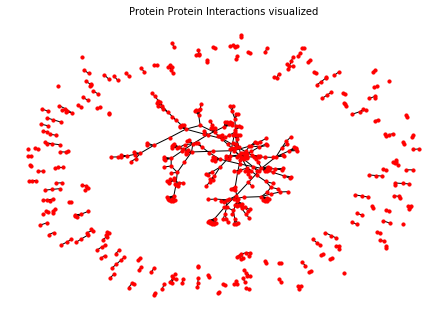

In [17]:
 
k=drawing_graph_from_edge_list(r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\edge_list_no_metadata.tsv')
nx.draw(k,node_size=10,node_color='red')
rcParams['figure.figsize'] = 50, 25
plt.title("Protein Protein Interactions visualized",fontsize=10)
print(nx.info(k))

In [18]:
def graph_node_labels(node_file_path:str)->dict:
    """funtion to generate the dict version of the node list
    arg: node list file path
    return : dictionary version of it"""
    f = open(node_file_path,'r') 
    interactions= f.readlines()
    nodes_dict= {}
    for pair in interactions:
        identifier,node=pair.strip().split('\t')
        nodes_dict[identifier]=node
    return nodes_dict     

In [19]:
def generate_graph( edge_list ,node_list ,output_graph):
    """function to generate pdf graph network file
    Arg 1- path of edge list file
    Arg 2- path of node list file
    Arg 3- path of output graph file
    Return - pdf version of the network graph """
    
    graph=drawing_graph_from_edge_list(edge_list)
    graph_pos=nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, graph_pos,node_color='red')#,alpha=0.5)
    nx.draw_networkx_edges(graph,graph_pos)
    node_labels= graph_node_labels(node_list)
    nx.draw(graph, labels=node_labels,with_labels=True,font_size=20)
    #nx.draw_networkx_labels(node_list, pos = nx.spring_layout(node_list), font_size = 20, with_labels = True);
    plt.savefig(output_graph)
    plt.title("Protein Protein Interactions visualized",fontsize=100)
    plt.show()

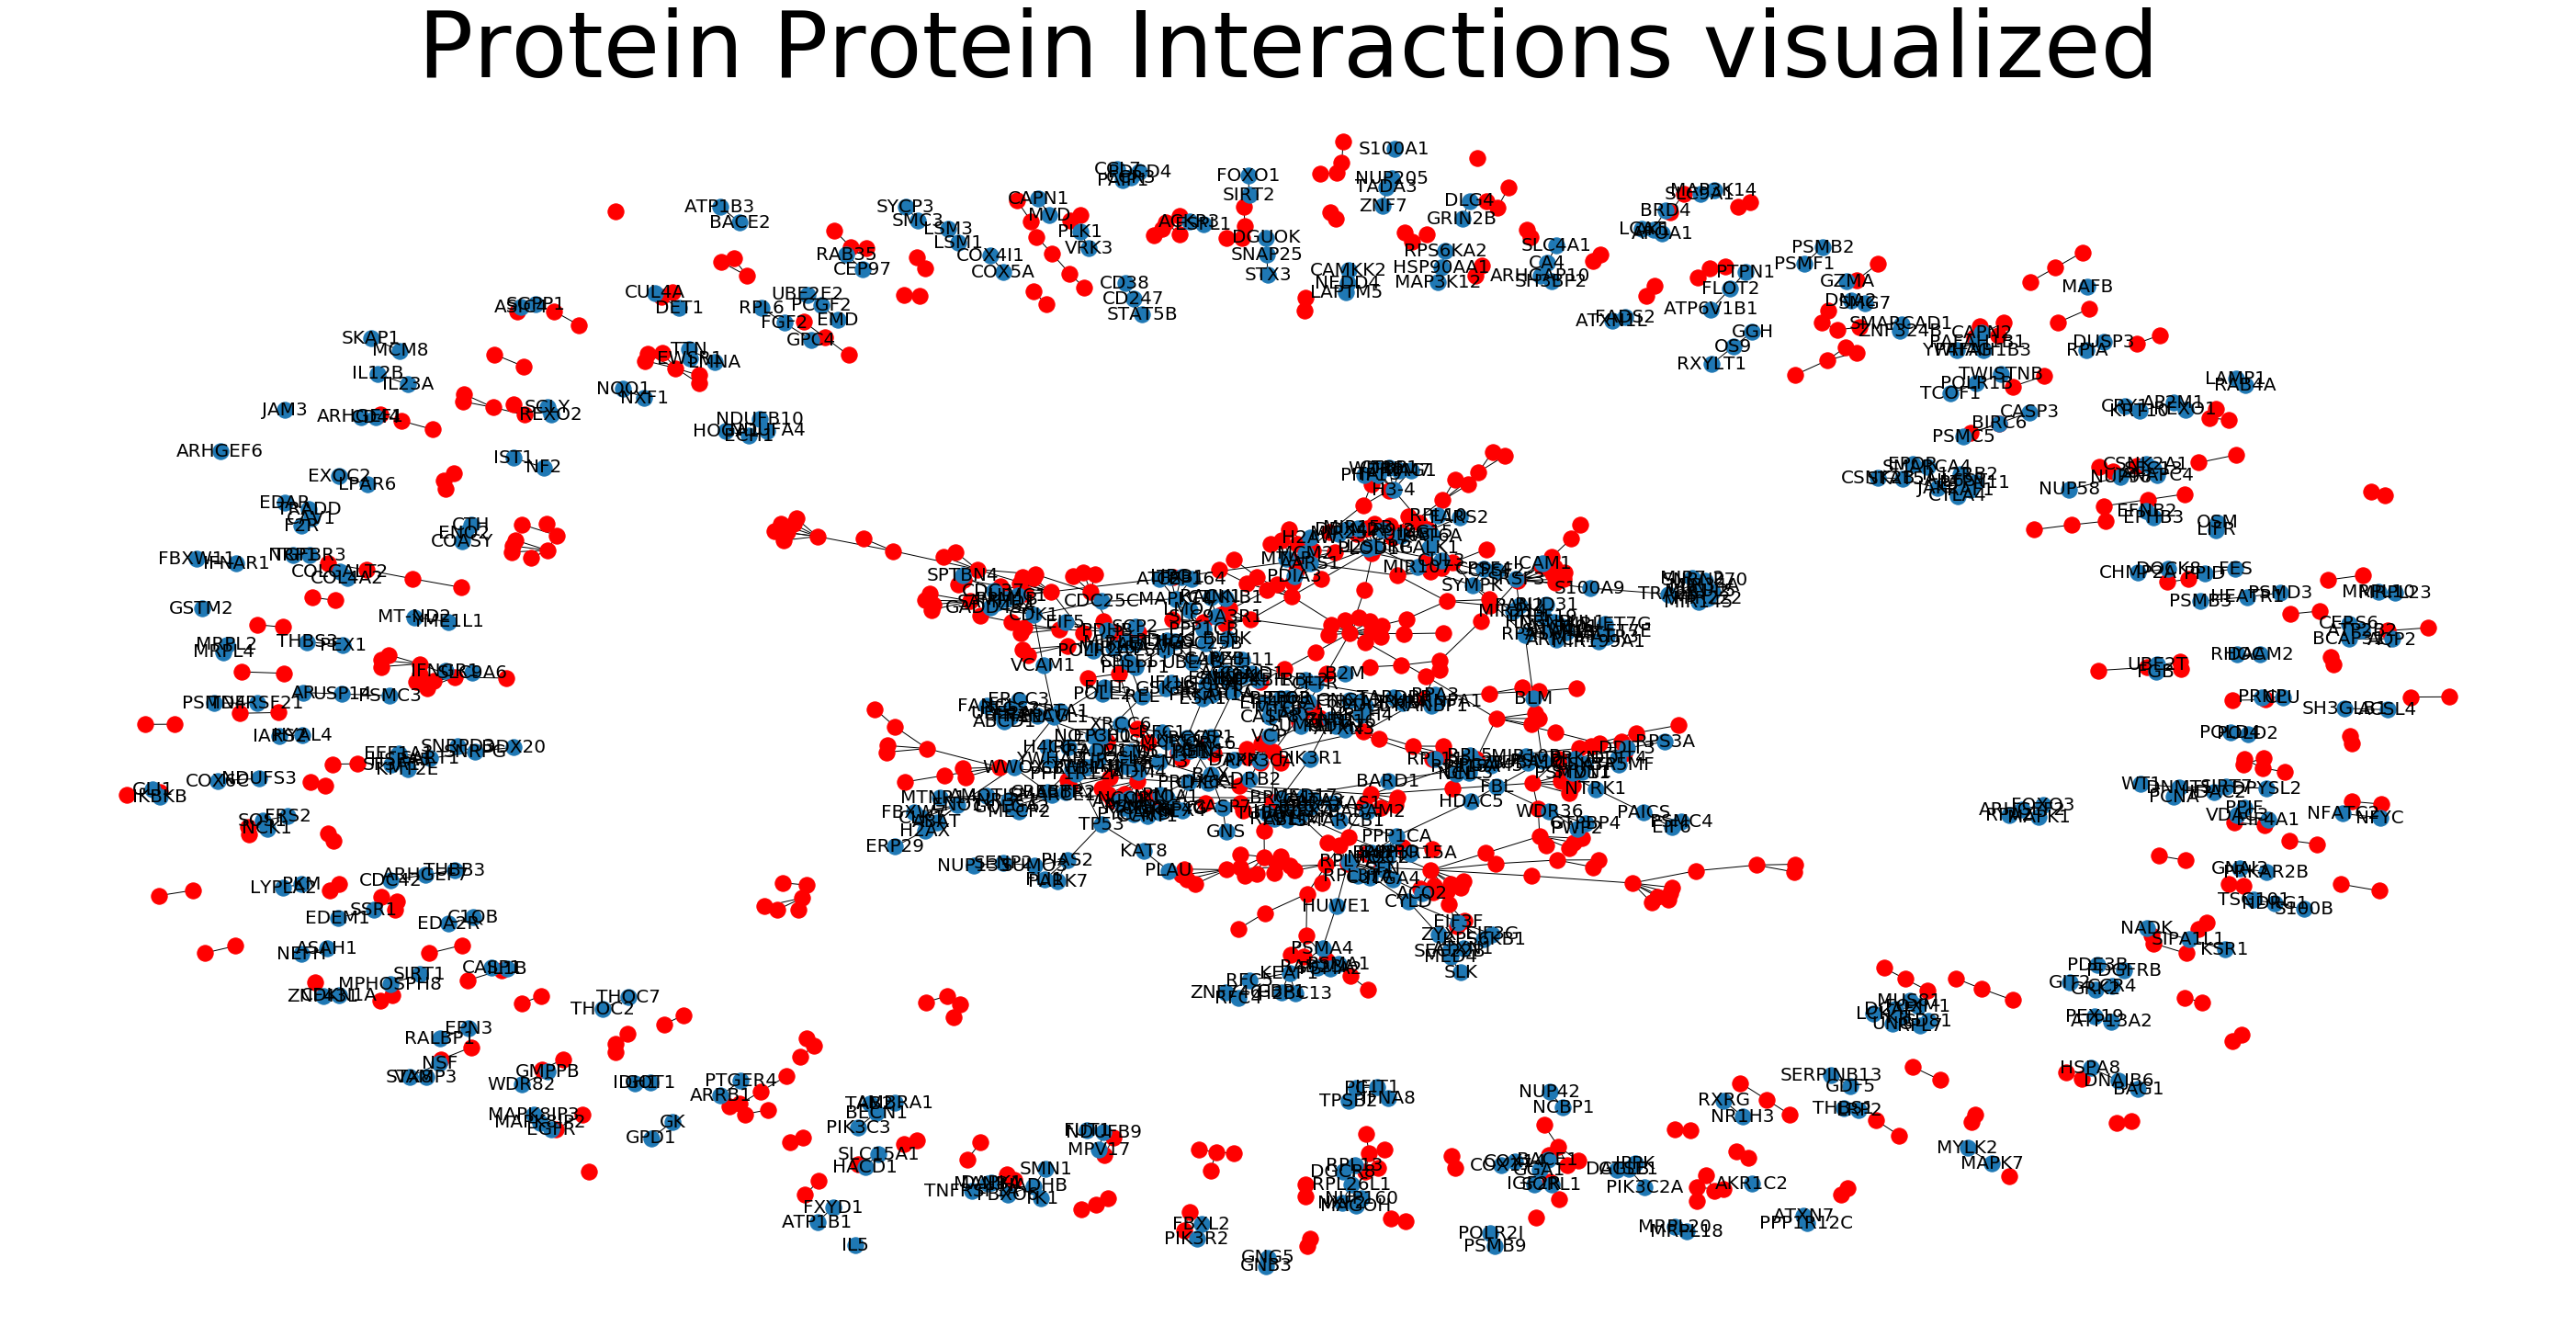

In [20]:
edge_list_path= r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\edge_list_no_metadata.tsv'
node_list_path= r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\node_list.tsv'
output_path= r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\graph_output.pdf'

kk=generate_graph( edge_list_path, node_list_path,output_path)

# Task 10 Commandline Compatible

Reading the input file: homework_exercise02_data_ppis.csv
Generating the output graph file: network_script_output.pdf


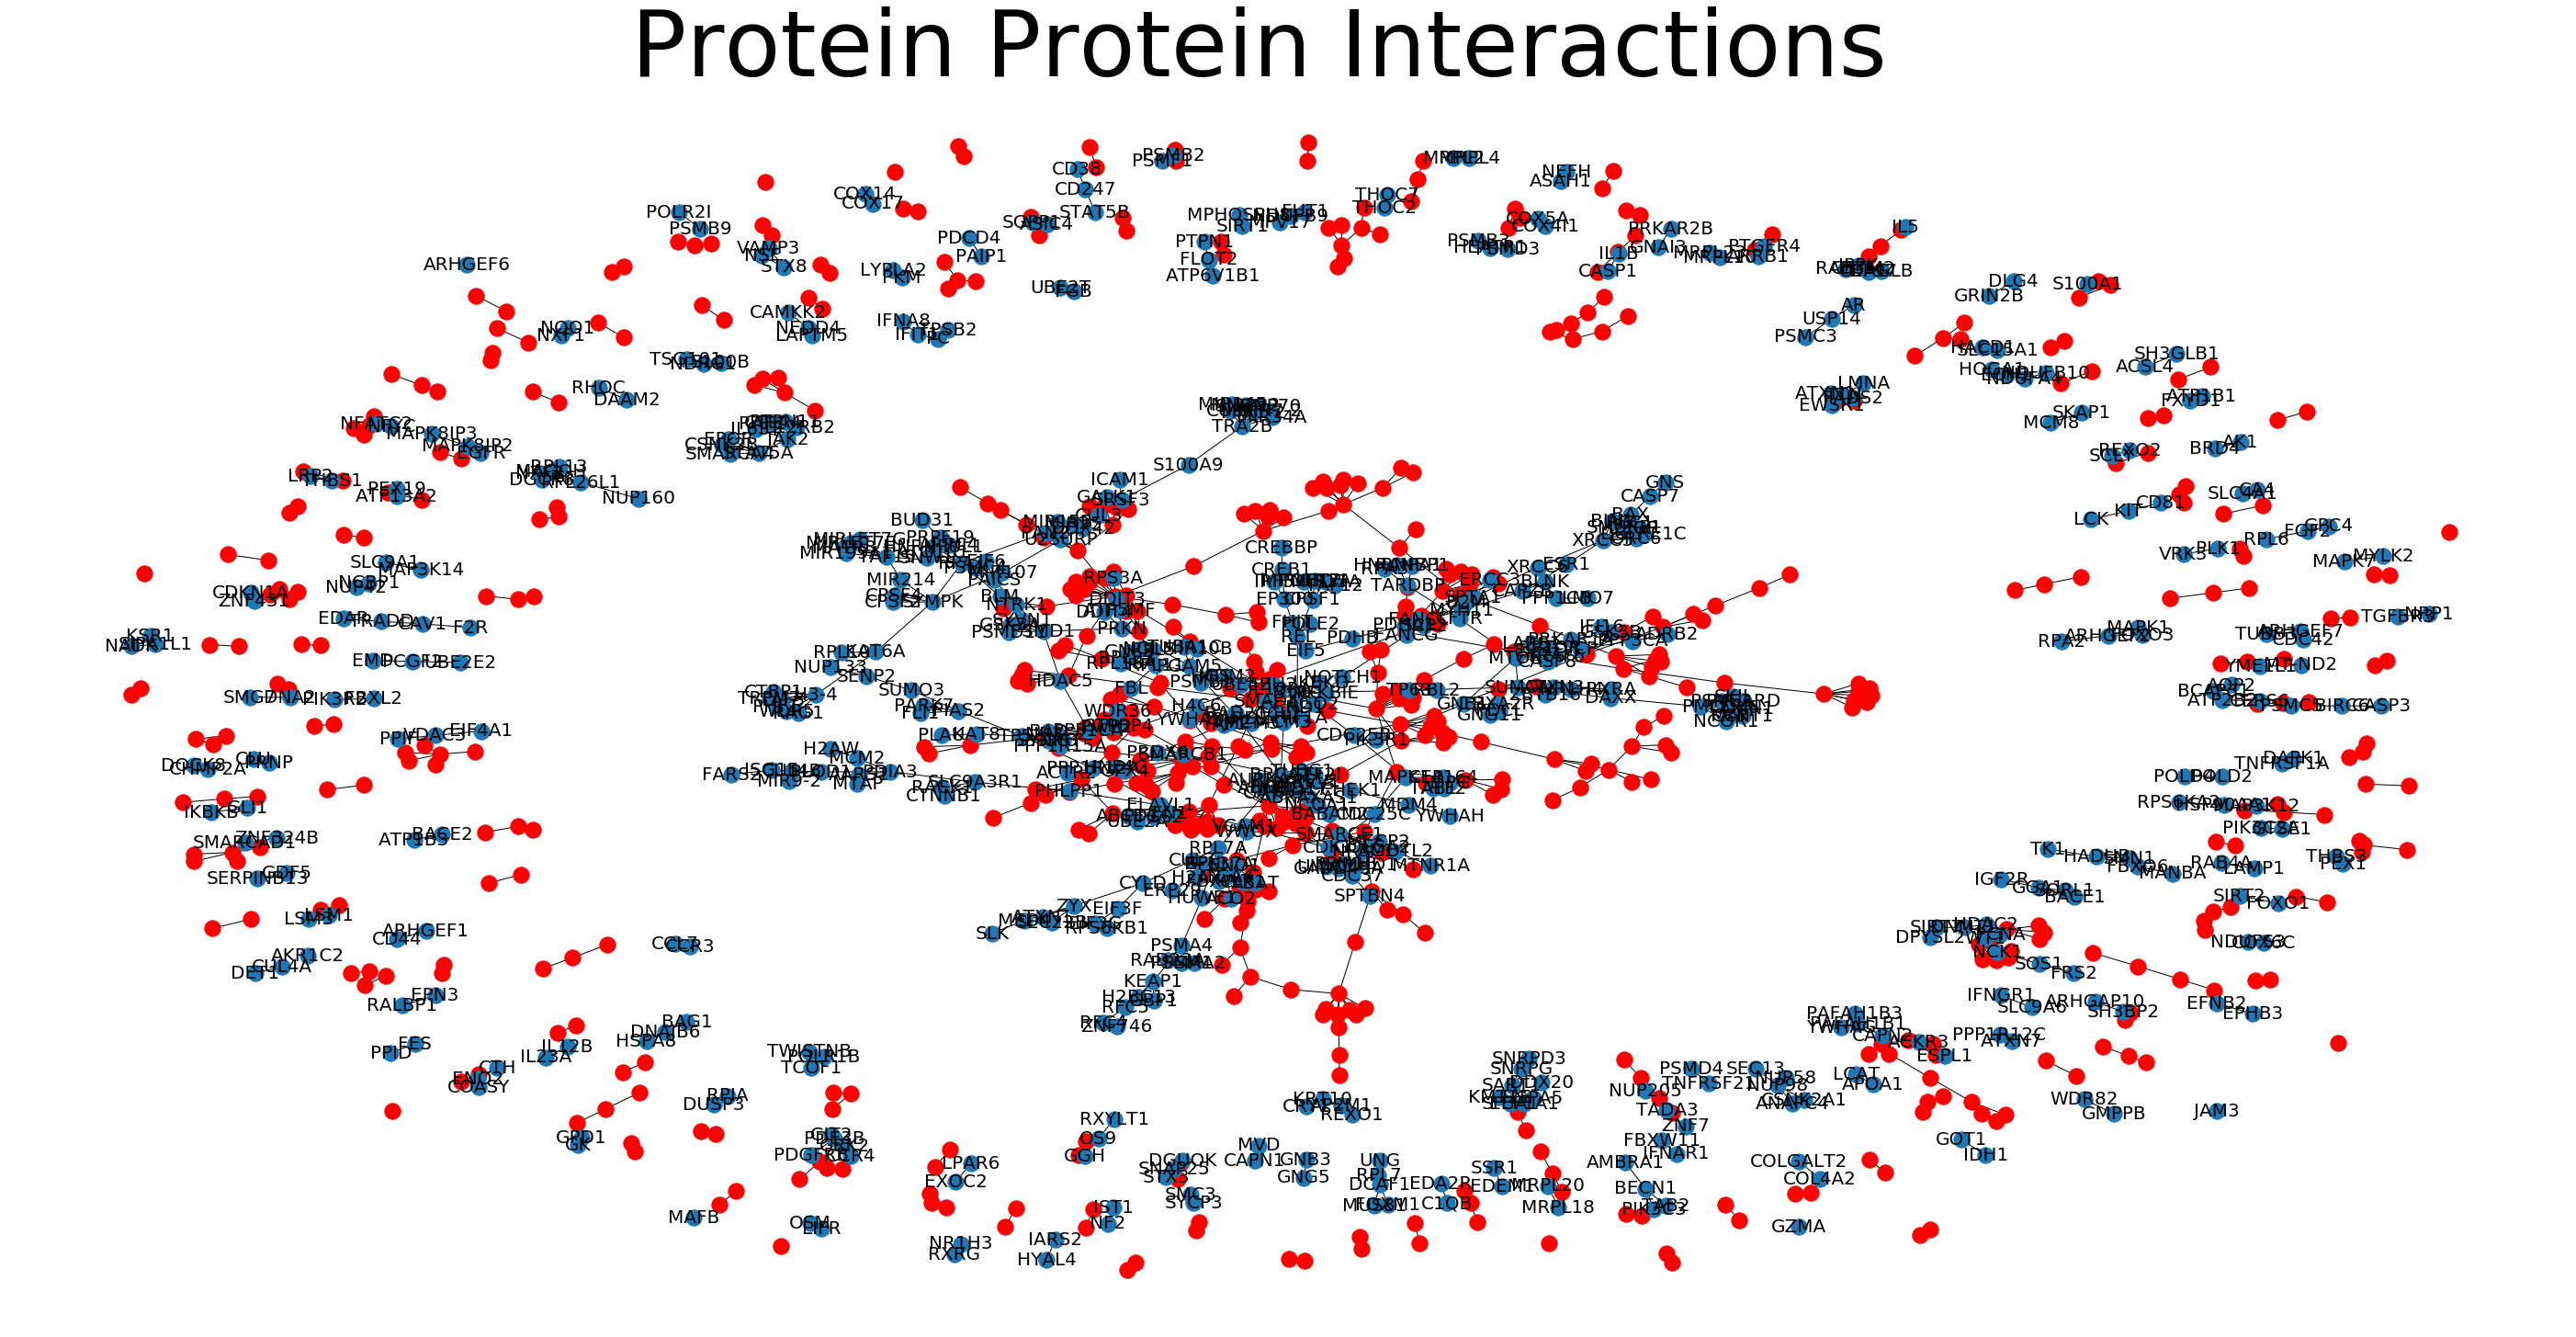

In [21]:
#input_file_path=r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\homework_exercise02_data_ppis.csv'
#ouptut_file_path=r'C:\Users\Ram Kumar R S\Desktop\plab2ws20-ruppasur\Exercise-02\network_script_output.pdf'

%run network_script.py homework_exercise02_data_ppis.csv network_script_output.pdf